In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('final_tomato_data.csv')
df.head()

,Date,commodity,average_price,Arrival,temperature_avg,wind_speed,air_pressure,rainfall_mm,diesel,USD_to_NPR,month
0,2022-01-01,Tomato_Big,115.0,0.0,9.0,4.7,1023.5,0.0,122.0,117.491806,1
1,2022-01-02,Tomato_Big,115.0,8000.0,9.8,4.5,1022.3,0.0,122.0,117.491806,1
2,2022-01-03,Tomato_Big,95.0,22375.0,10.0,5.3,1020.6,0.0,122.0,117.491806,1
3,2022-01-04,Tomato_Big,95.0,8000.0,10.2,5.0,1020.6,0.0,122.0,117.467239,1
4,2022-01-05,Tomato_Big,85.0,32500.0,11.0,5.8,1020.6,0.0,122.0,117.551315,1


In [4]:
df.tail()

,Date,commodity,average_price,Arrival,temperature_avg,wind_speed,air_pressure,rainfall_mm,diesel,USD_to_NPR,month
1205,2025-10-08,Tomato_Big,67.60,10000.0,21.4,3.3,1017.8,5.6,145.0,140.660339,10
1206,2025-10-16,Tomato_Big,52.80,10000.0,19.9,5.2,1017.4,0.3,145.0,139.459076,10
1207,2025-10-18,Tomato_Big,49.10,8000.0,19.8,4.8,1017.2,0.9,145.0,139.742615,10
1208,2025-10-19,Tomato_Big,47.25,0.0,19.8,4.8,1017.2,0.0,145.0,139.742615,10
1209,2025-10-20,Tomato_Big,47.75,0.0,19.8,4.8,1017.2,0.0,145.0,139.742615,10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210 entries, 0 to 1209
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             1210 non-null   object 
 1   commodity        1210 non-null   object 
 2   average_price    1210 non-null   float64
 3   Arrival          1210 non-null   float64
 4   temperature_avg  1210 non-null   float64
 5   wind_speed       1210 non-null   float64
 6   air_pressure     1210 non-null   float64
 7   rainfall_mm      1210 non-null   float64
 8   diesel           1210 non-null   float64
 9   USD_to_NPR       1210 non-null   float64
 10  month            1210 non-null   int64  
dtypes: float64(8), int64(1), object(2)
memory usage: 104.1+ KB


In [6]:
# ===============================================================
# 🍅 TOMATO PRICE FORECASTING — MODEL COMPARISON
# ===============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [7]:
# ---------------------------------------------------------------
# STEP 1: LOAD DATA
# ---------------------------------------------------------------
df = pd.read_csv('final_tomato_data.csv', parse_dates=['Date'])
df = df.sort_values('Date')
df = df.drop(columns=['commodity'])
df = df.set_index('Date')

print("✅ Data Loaded")
print(df.info())



✅ Data Loaded
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1210 entries, 2022-01-01 to 2025-10-20
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   average_price    1210 non-null   float64
 1   Arrival          1210 non-null   float64
 2   temperature_avg  1210 non-null   float64
 3   wind_speed       1210 non-null   float64
 4   air_pressure     1210 non-null   float64
 5   rainfall_mm      1210 non-null   float64
 6   diesel           1210 non-null   float64
 7   USD_to_NPR       1210 non-null   float64
 8   month            1210 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 94.5 KB
None


In [8]:
# ---------------------------------------------------------------
# STEP 2: TRAIN-TEST SPLIT
# ---------------------------------------------------------------
train = df.loc[:'2024-12-31']
test = df.loc['2025-01-01':]

X_train = train.drop(columns=['average_price'])
y_train = train['average_price']
X_test = test.drop(columns=['average_price'])
y_test = test['average_price']


In [10]:
train.tail()

,average_price,Arrival,temperature_avg,wind_speed,air_pressure,rainfall_mm,diesel,USD_to_NPR,month
Date,,,,,,,,,
2024-12-27,77.727273,37000.0,10.8,4.9,1024.1,0.0,153.0,134.344711,12
2024-12-28,77.272727,31750.0,10.4,4.6,1023.7,3.8,153.0,135.418411,12
2024-12-29,76.818182,40990.0,12.0,6.1,1021.3,4.6,153.0,135.418411,12
2024-12-30,76.363636,21075.0,11.0,5.4,1020.5,0.0,153.0,135.418411,12
2024-12-31,75.909091,22000.0,11.0,5.4,1021.6,0.0,153.0,135.156754,12


In [11]:
# ===============================================================
# 🧩 MODEL 1: SARIMA (Statistical)
# ===============================================================
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima = SARIMAX(y_train, order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_fit = sarima.fit(disp=False)
sarima_pred = sarima_fit.forecast(steps=len(y_test))
sarima_pred.index = y_test.index

eval_sarima = pd.DataFrame({'Actual': y_test, 'Predicted': sarima_pred}).dropna()
sarima_rmse = np.sqrt(mean_squared_error(eval_sarima['Actual'], eval_sarima['Predicted']))
sarima_mae = mean_absolute_error(eval_sarima['Actual'], eval_sarima['Predicted'])
sarima_r2 = r2_score(eval_sarima['Actual'], eval_sarima['Predicted'])

print(f"\nSARIMA → RMSE: {sarima_rmse:.3f}, MAE: {sarima_mae:.3f}, R²: {sarima_r2:.3f}")


C:\Users\User\Miniconda3\envs\myConda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\Miniconda3\envs\myConda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



SARIMA → RMSE: 25.776, MAE: 20.203, R²: -1.215


C:\Users\User\Miniconda3\envs\myConda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [12]:
# ===============================================================
# 🧩 MODEL 2: LINEAR REGRESSION
# ===============================================================
from sklearn.linear_model import LinearRegression

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)

lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)
print(f"Linear Regression → RMSE: {lr_rmse:.3f}, MAE: {lr_mae:.3f}, R²: {lr_r2:.3f}")


Linear Regression → RMSE: 25.322, MAE: 21.787, R²: -1.137


In [13]:
# ===============================================================
# 🧩 MODEL 3: RANDOM FOREST
# ===============================================================
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
print(f"Random Forest → RMSE: {rf_rmse:.3f}, MAE: {rf_mae:.3f}, R²: {rf_r2:.3f}")


Random Forest → RMSE: 20.375, MAE: 16.326, R²: -0.384


In [14]:
# ===============================================================
# 🧩 MODEL 4: XGBOOST
# ===============================================================
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6,
                   subsample=0.8, colsample_bytree=0.8, random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)
print(f"XGBoost → RMSE: {xgb_rmse:.3f}, MAE: {xgb_mae:.3f}, R²: {xgb_r2:.3f}")


XGBoost → RMSE: 20.465, MAE: 16.207, R²: -0.396



Using device: cuda

Training LSTM model...
Epoch [5/30] → Loss: 0.066532
Epoch [10/30] → Loss: 0.034928
Epoch [15/30] → Loss: 0.017961
Epoch [20/30] → Loss: 0.020876
Epoch [25/30] → Loss: 0.019403
Epoch [30/30] → Loss: 0.016074
LSTM → RMSE: 15.232, MAE: 12.131, R²: 0.092

===== MODEL PERFORMANCE COMPARISON =====
               Model       RMSE        MAE        R²
0             SARIMA  25.775721  20.203479 -1.214661
1  Linear Regression  25.322221  21.786802 -1.137417
2      Random Forest  20.374791  16.325636 -0.383796
3            XGBoost  20.464861  16.207235 -0.396057
4               LSTM  15.231769  12.130738  0.092391


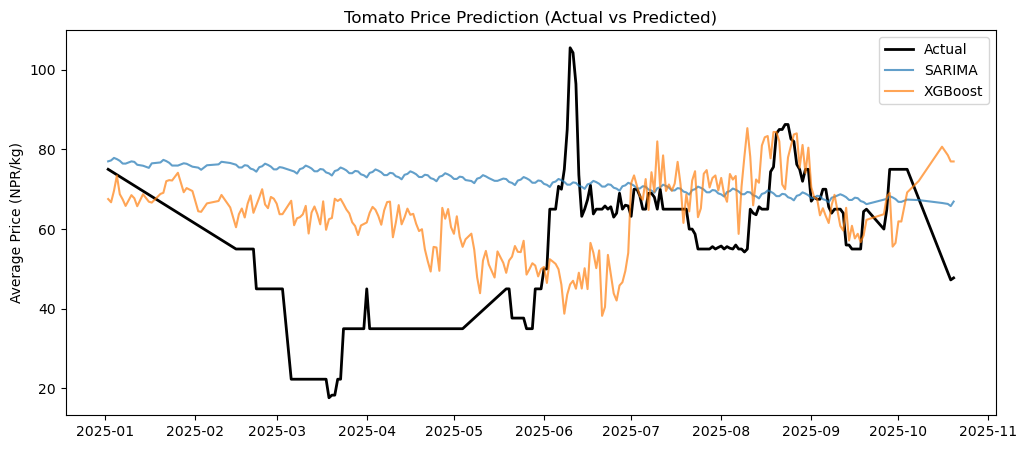

In [15]:
# ===============================================================
# 🧩 MODEL 5: LSTM (PyTorch)
# ===============================================================
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"\nUsing device: {device}")

# Use only average_price for simplicity
series = df[['average_price']].values
scaler_ts = MinMaxScaler()
series_scaled = scaler_ts.fit_transform(series)

def create_sequences(data, window):
    X, y = [], []
    for i in range(window, len(data)):
        X.append(data[i-window:i])
        y.append(data[i])
    return np.array(X), np.array(y)

window = 7
X, y = create_sequences(series_scaled, window)
split = int(len(X) * 0.85)
X_train_lstm, X_test_lstm = X[:split], X[split:]
y_train_lstm, y_test_lstm = y[:split], y[split:]

X_train_lstm = torch.tensor(X_train_lstm, dtype=torch.float32).to(device)
y_train_lstm = torch.tensor(y_train_lstm, dtype=torch.float32).to(device)
X_test_lstm = torch.tensor(X_test_lstm, dtype=torch.float32).to(device)
y_test_lstm = torch.tensor(y_test_lstm, dtype=torch.float32).to(device)

class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, output_size=1):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    def forward(self, x):
        out, _ = self.lstm(x)
        return self.fc(out[:, -1, :])

model = LSTMModel().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

print("\nTraining LSTM model...")
for epoch in range(30):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_lstm)
    loss = criterion(output, y_train_lstm)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 5 == 0:
        print(f"Epoch [{epoch+1}/30] → Loss: {loss.item():.6f}")

model.eval()
with torch.no_grad():
    lstm_pred = model(X_test_lstm).cpu().numpy()

lstm_pred = scaler_ts.inverse_transform(lstm_pred)
y_true_lstm = scaler_ts.inverse_transform(y_test_lstm.cpu().numpy())

lstm_rmse = np.sqrt(mean_squared_error(y_true_lstm, lstm_pred))
lstm_mae = mean_absolute_error(y_true_lstm, lstm_pred)
lstm_r2 = r2_score(y_true_lstm, lstm_pred)
print(f"LSTM → RMSE: {lstm_rmse:.3f}, MAE: {lstm_mae:.3f}, R²: {lstm_r2:.3f}")

# ===============================================================
# 📊 MODEL PERFORMANCE COMPARISON
# ===============================================================
results = pd.DataFrame({
    'Model': ['SARIMA', 'Linear Regression', 'Random Forest', 'XGBoost', 'LSTM'],
    'RMSE': [sarima_rmse, lr_rmse, rf_rmse, xgb_rmse, lstm_rmse],
    'MAE': [sarima_mae, lr_mae, rf_mae, xgb_mae, lstm_mae],
    'R²': [sarima_r2, lr_r2, rf_r2, xgb_r2, lstm_r2]
})
print("\n===== MODEL PERFORMANCE COMPARISON =====")
print(results)

# ===============================================================
# 📈 VISUALIZATION
# ===============================================================
plt.figure(figsize=(12,5))
plt.plot(y_test.index, y_test, label='Actual', color='black', lw=2)
plt.plot(y_test.index, sarima_pred, label='SARIMA', alpha=0.7)
plt.plot(y_test.index, xgb_pred, label='XGBoost', alpha=0.7)
plt.legend()
plt.title("Tomato Price Prediction (Actual vs Predicted)")
plt.ylabel("Average Price (NPR/kg)")
plt.show()
